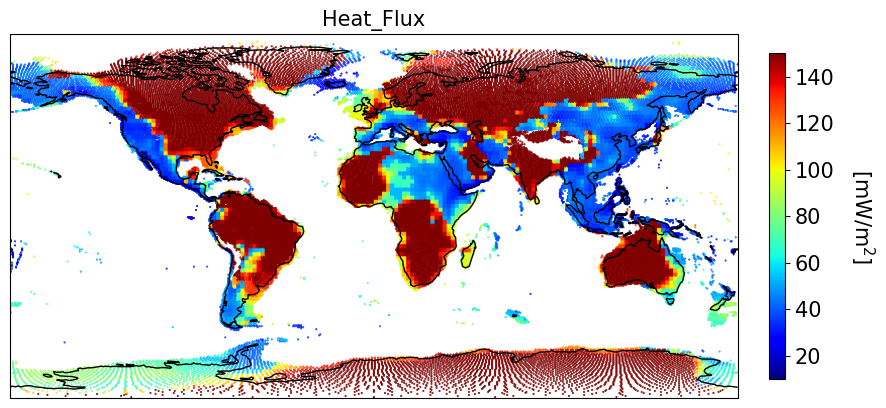

In [23]:
import pandas as pd
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
scaler = StandardScaler()

def plotting(Lon,Lat,value,unit,name,a,b,Plot_file,Run):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    plt.scatter(Lon,Lat,c=value,cmap='jet', marker='.', s=1, vmin=a, vmax=b)
    cb = plt.colorbar(fraction=0.021, pad=0.04)
    cb.set_label('%s' % unit, labelpad=30, fontsize=15, rotation=270) 
    plt.title('%s' % name, fontsize=15)
    cb.ax.tick_params(labelsize=15)
    plt.show()
    fig.savefig('%s_%s.png' % (name,state), dpi=300)


data = pd.read_csv('Data/globaldatasetttimg.csv',encoding='iso-8859-1')
data = data.to_numpy()
Results_file = 'test'
Plot_file = 'Plots'
state = 'ab'
Run = "1"
Lon_p = []
Lat_p = []
for i in range(len(data)):
    Lon_p.append(data[i, 0])
    Lat_p.append(data[i, 1])
new_pred = data[:,32]

plotting(Lon_p, Lat_p, new_pred, '[mW/m$^2$]', 'Heat_Flux',10, 150, Plot_file, Run)


In [10]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import copy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
image = np.zeros((360, 720, 33))

data1 = pd.read_csv('Data/yaglobaldatasetttimgg.csv',encoding='iso-8859-1')
Features = ['Lon','Lat','Tectonics', 'Moho_LitMod_Aus17_Afr', 'Trench', 'LAB_LitMod', 'Ridge',
            'Transform', 'MeanCurv', 'YoungRift', 'Sus_LitMod_Aus17_Afr', 'Bz5',
            'Topo', 'Volcanos','lit','vsv40',
                'vsv50',
                'vsv70',
                'vsv90',
                'vsv100',
                'vsv125',
                'vsv150',
                'vsv175',
                'vsv200',
                'vsv210',
                'vsv230',
                'vsv250',
                'vsv275',
                'vsv300',
                'HF1',
                'HF2',
                'HF']
data = DataFrame(data1, columns=Features)
print(data.info())
data = data.to_numpy()
data = np.nan_to_num(data, nan=0)
i = 0
for entry in data:
    first_col = entry[0]  
    second_col = entry[1]  
    for col_idx in range(0, 32):
        value = entry[col_idx]
        #print(value)

        row_index = int((second_col+ + 90) / 0.5)-1  
        col_index = int((first_col + 180 ) / 0.5)-1 
        #print(row_index)
        if 0 <= row_index < 360 and 0 <= col_index < 720:
            i = i + 1
            image[row_index, col_index, col_idx] = value
print(i)
print(image[:,:,31].shape)
image[:,:,32] = image[:,:, 31]
image[:, :, 31][image[:, :, 31]!= 0] = 1
kk = copy.deepcopy(image[:,:,31])
image[:,:,31] = image[:,:,32]
image[:,:,32] = kk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63183 entries, 0 to 63182
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Lon                    63183 non-null  float64
 1   Lat                    63183 non-null  float64
 2   Tectonics              63183 non-null  int64  
 3   Moho_LitMod_Aus17_Afr  63183 non-null  float64
 4   Trench                 63183 non-null  float64
 5   LAB_LitMod             63183 non-null  float64
 6   Ridge                  63183 non-null  float64
 7   Transform              63183 non-null  float64
 8   MeanCurv               63183 non-null  float64
 9   YoungRift              63182 non-null  float64
 10  Sus_LitMod_Aus17_Afr   63183 non-null  float64
 11  Bz5                    63183 non-null  float64
 12  Topo                   63183 non-null  float64
 13  Volcanos               63183 non-null  float64
 14  lit                    63183 non-null  int64  
 15  vs

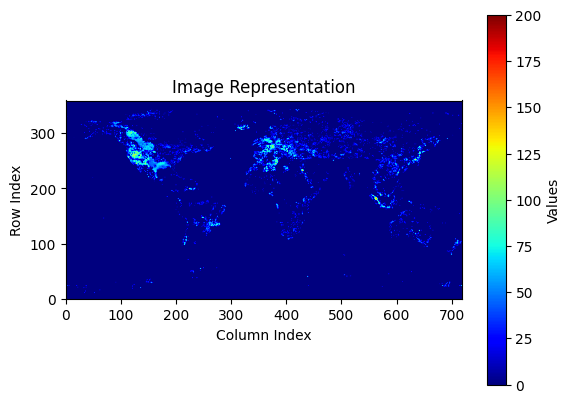

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
plt.imshow(image[:,:,31], cmap='jet', origin='lower')
plt.colorbar(label='Values') 
plt.title('Image Representation')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.savefig('image_representation.png', dpi=60)  
plt.show()  

In [13]:
np.save('Data/globaldatasetttimgg.npy', image)

In [14]:
import numpy as np
img = np.load('Data/globaldatasetttimgg.npy')
print(img.shape)

(360, 720, 33)


In [16]:
import os
region_size = 64
step_size = 8
region_count=0
high_non_zero_regions = []
low_non_zero_regions = []
output_folder = "img_npy"
os.makedirs(output_folder,exist_ok=True)
threshold = 32 
for i in range(0, img.shape[0] - region_size + 1, step_size):
    for j in range(0, img.shape[1] - region_size + 1, step_size):
        region = img[i:i + region_size, j:j + region_size,:]
        region1 = img[i:i + region_size, j:j + region_size,14]
        non_zero_count = np.sum(region1 != 0)

        if non_zero_count >= threshold:
            high_non_zero_regions.append((i, j, region1))
            np_path = os.path.join(output_folder, f"region_{i}_{j}_nonzero_{non_zero_count}.npy")

            np.save(np_path, region)
            region_count += 1
        else:
            low_non_zero_regions.append((i, j, region))

print(f"Total number of high non-zero regions: {len(high_non_zero_regions)}")
print(f"Total number of low non-zero regions: {len(low_non_zero_regions)}")

for idx, (i, j, region1) in enumerate(high_non_zero_regions[:3]):
    print(f"High non-zero region at ({i}, {j}) with non-zero count: {np.sum(region1 != 0)}")


Total number of high non-zero regions: 3154
Total number of low non-zero regions: 0
High non-zero region at (0, 0) with non-zero count: 233
High non-zero region at (0, 8) with non-zero count: 231
High non-zero region at (0, 16) with non-zero count: 240
